In [1]:
import keras

2024-01-16 10:17:20.960656: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
digit_mnist = keras.datasets.mnist
(X_train_full ,y_train_full) , (X_test,y_test)=digit_mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


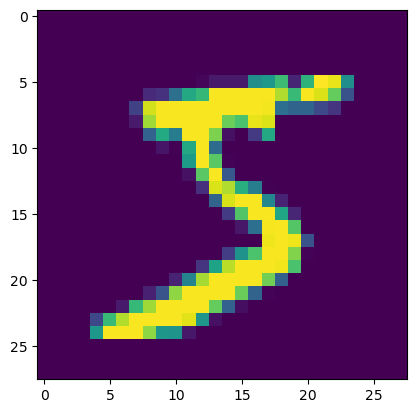

In [10]:
plt.imshow(X_train_full[0])

In [7]:
X_train_full[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train_full[0]

5

In [11]:
X_train_n=X_train_full / 255
X_test_n=X_test / 255

In [19]:
X_train_n[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
digit_mnist

<module 'keras.datasets.mnist' from '/Users/amitabhsinha/anaconda3/lib/python3.11/site-packages/keras/datasets/mnist/__init__.py'>

In [17]:
X_valid, X_train =X_train_n[:6000],X_train_n[6000:]
y_valid, y_train=y_train_full[:6000],y_train_full[6000:]

In [18]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
import numpy as np

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
model1 =keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28,28]))
model1.add(keras.layers.Dense(200,activation="relu"))
model1.add(keras.layers.Dense(100,activation="relu"))
model1.add(keras.layers.Dense(10,activation="softmax"))

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


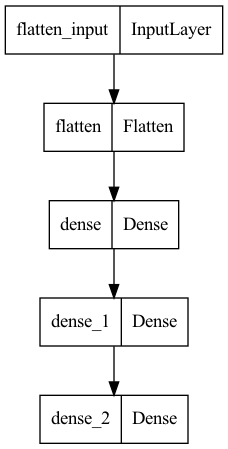

In [26]:
import pydot
keras.utils.plot_model(model1)

In [27]:
weights , biases=model1.layers[1].get_weights()

In [28]:
weights.shape

(784, 200)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
biases.shape

(200,)

In [31]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
model_history=model1.fit(X_train , y_train, epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6381 - accuracy: 0.8338 - val_loss: 0.3131 - val_accuracy: 0.9142
Epoch 2/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2910 - accuracy: 0.9169 - val_loss: 0.2437 - val_accuracy: 0.9347
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2375 - accuracy: 0.9322 - val_loss: 0.2089 - val_accuracy: 0.9413
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2029 - accuracy: 0.9422 - val_loss: 0.1816 - val_accuracy: 0.9485
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1776 - accuracy: 0.9490 - val_loss: 0.1618 - val_accuracy: 0.9552
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1580 - accuracy: 0.9551 - val_loss: 0.1493 - val_accuracy: 0.9575
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1422 - accuracy: 0.9598 - val_loss: 0.1367 - val_accuracy:

In [33]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1688}

In [34]:
model_history.history

{'loss': [0.6381359100341797,
  0.2910154163837433,
  0.237515389919281,
  0.2029133439064026,
  0.17762507498264313,
  0.15799714624881744,
  0.14224325120449066,
  0.12911713123321533,
  0.11802833527326584,
  0.10861566662788391,
  0.10040202736854553,
  0.09334881603717804,
  0.08655986934900284,
  0.08070115745067596,
  0.07565602660179138,
  0.07102076709270477,
  0.06667473167181015,
  0.06225201487541199,
  0.05882500112056732,
  0.05538531765341759,
  0.0522434264421463,
  0.049294549971818924,
  0.04663339629769325,
  0.04391878843307495,
  0.041541874408721924,
  0.03922737017273903,
  0.03715313971042633,
  0.035432372242212296,
  0.033403344452381134,
  0.0316590778529644],
 'accuracy': [0.8337592482566833,
  0.9169444441795349,
  0.9322222471237183,
  0.9422222375869751,
  0.9489814639091492,
  0.9550555348396301,
  0.9597963094711304,
  0.9640926122665405,
  0.9662777781486511,
  0.9692777991294861,
  0.9719259142875671,
  0.9739629626274109,
  0.9758333563804626,
  0.97

### When you train a model using a library like Keras in TensorFlow, the .fit method returns a History object. This object contains information about the training process, including metrics like loss and accuracy, for each epoch.



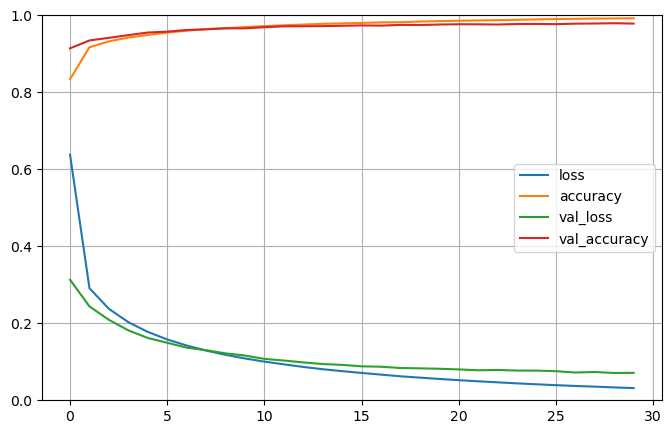

In [36]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
model_history=model1.fit(X_train , y_train, epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0301 - accuracy: 0.9932 - val_loss: 0.0706 - val_accuracy: 0.9790
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9936 - val_loss: 0.0733 - val_accuracy: 0.9782
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9940 - val_loss: 0.0704 - val_accuracy: 0.9793
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9949 - val_loss: 0.0715 - val_accuracy: 0.9787
Epoch 5/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0243 - accuracy: 0.9950 - val_loss: 0.0703 - val_accuracy: 0.9797
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9954 - val_loss: 0.0682 - val_accuracy: 0.9802
Epoch 7/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9956 - val_loss: 0.0698 - val_accuracy:

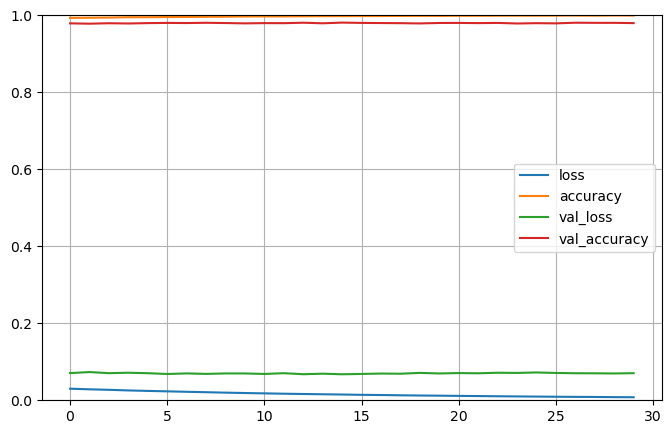

In [38]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [39]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 17.7393 - accuracy: 0.9737


[17.739290237426758, 0.9736999869346619]

In [40]:
X_new =X_test[:5]

In [42]:
y_proba = model1.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 129ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

AxesImage(size=(28, 28))


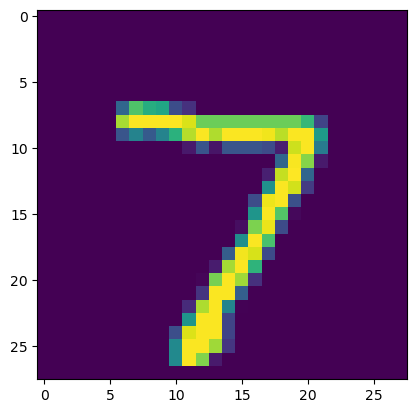

In [43]:
print(plt.imshow(X_test[0]))

AxesImage(size=(28, 28))


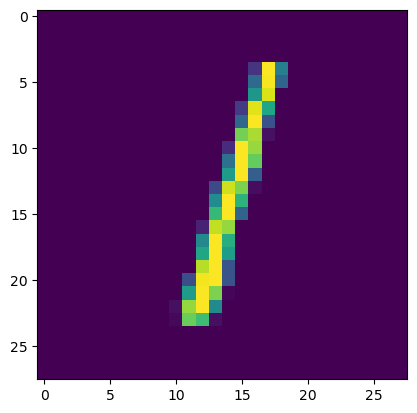

In [44]:
print(plt.imshow(X_test[2]))

AxesImage(size=(28, 28))


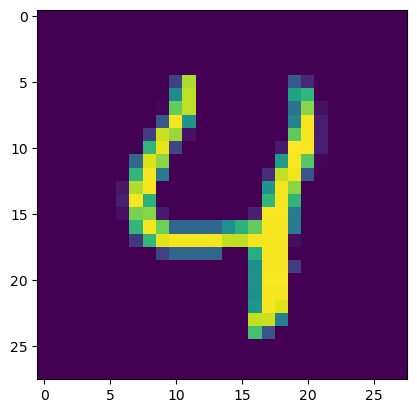

In [45]:
print(plt.imshow(X_test[4]))